## Problem Statement:

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) `Primary Fuel`    2) `capacity_mw`

In [237]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,BaggingRegressor



import warnings
warnings.filterwarnings("ignore")

In [238]:
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [239]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Top 5 no. of records of the GlobalPowerPlant dataset.

In [240]:
data.shape

(908, 25)

In [241]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

datatypes of columns either of float type or object.

In [242]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh` (number): estimated electricity generation in gigawatt-hours.

In [243]:
data.shape

(908, 25)

Dataset has 908 no. of records and 25 columns.

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
country                     908 non-null object
country_long                908 non-null object
name                        908 non-null object
gppd_idnr                   908 non-null object
capacity_mw                 908 non-null float64
latitude                    862 non-null float64
longitude                   862 non-null float64
primary_fuel                908 non-null object
other_fuel1                 199 non-null object
other_fuel2                 1 non-null object
other_fuel3                 0 non-null float64
commissioning_year          528 non-null float64
owner                       342 non-null object
source                      908 non-null object
url                         908 non-null object
geolocation_source          889 non-null object
wepp_id                     0 non-null float64
year_of_capacity_data       520 non-null float64
generation_gwh_2013         38

In some columns there are 0 non-null values in one columns there is only 1 non-null values. 

13 columns are of float types and 12 are of object types.

Memory usage is 177.4kb.

In [245]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

`estimated_generation_gwh`,`other_fuel3`,`wepp_id` these are columns that has null values only.

In [246]:
data['other_fuel1']=data['other_fuel1'].fillna(data.other_fuel1.mode()[0])

Here i replaced Null values with the most occured fuel.

In [247]:
data.other_fuel1.value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

now we can drop other_fuel_2,other_fuel_3 these two columns. other_fuel_3 it has all null values in it.

wepp+id,estimated_generation_gwh these two columns also has to drop as these has no values in it.

In [248]:
data.country.value_counts()

IND    908
Name: country, dtype: int64

In [249]:
data.country_long.value_counts()

India    908
Name: country_long, dtype: int64

country,country_long these two columns also has to be dropped. As these contains only single values in it.

In [250]:
data['owner'].fillna(data.owner.mode()[0],inplace=True)

filled nan values in owner with their mode value.

In [251]:
data.commissioning_year.mean()

1996.876893939394

In [252]:
data.commissioning_year.median()

2000.0

In [253]:
data.commissioning_year.mode()[0]

2013.0

In [254]:
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())

In [255]:
data.commissioning_year.isna().sum()

0

filled null values of commisioning_year with the median occured.

In [256]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [257]:
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())
data["generation_gwh_2016"]=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())

In [258]:
data['generation_data_source'].fillna(data.generation_data_source.mode()[0],inplace=True)

In [259]:
data['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [260]:
data['year_of_capacity_data'].fillna(data.year_of_capacity_data.mode()[0],inplace=True)

In [261]:
data['geolocation_source'].fillna(data.geolocation_source.mode()[0],inplace=True)

In [262]:
data.latitude.fillna(data.latitude.mean(),inplace=True)
data.longitude.fillna(data.longitude.mean(),inplace=True)

In [263]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

all thses columns that showinf null values these columns has no values, So, i decided its better to drop these columns.

In [264]:
data.country.unique()

array(['IND'], dtype=object)

In [265]:
data.country_long.unique()

array(['India'], dtype=object)

In [266]:
data.year_of_capacity_data.unique()

array([2018.])

In [267]:
data.drop(columns=['country', 'country_long','wepp_id', 'other_fuel2','other_fuel3','estimated_generation_gwh', 'year_of_capacity_data'],inplace=True)

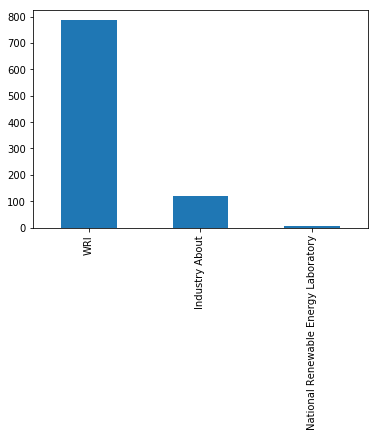

In [268]:
data['geolocation_source'].value_counts().plot(kind='bar')

In [269]:
data['geolocation_source']=data['geolocation_source'].fillna("WRI")

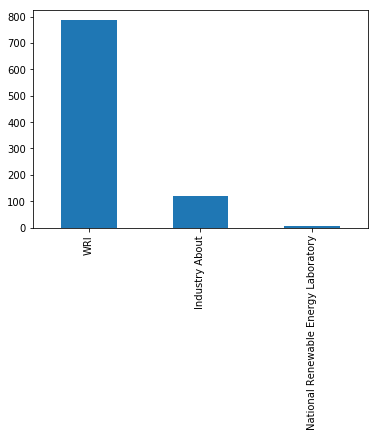

In [270]:
data['geolocation_source'].value_counts().plot(kind='bar')

In [271]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [272]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [273]:
#### Plotting featurse v/s primary_fuel

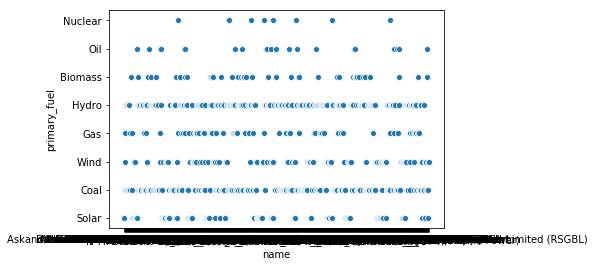

In [274]:
sns.scatterplot(data['name'],data['primary_fuel'])

as name are disributed to all class of primary_fuel.

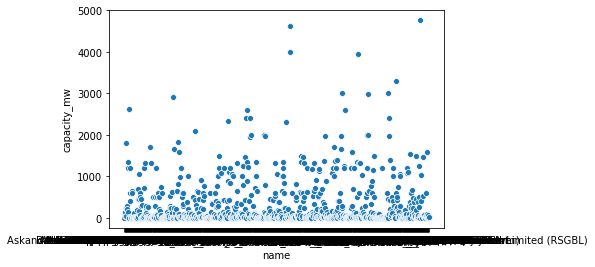

In [275]:
sns.scatterplot(data['name'],data['capacity_mw'])

the powerplant has average  capacity in range 1000 to 1500.

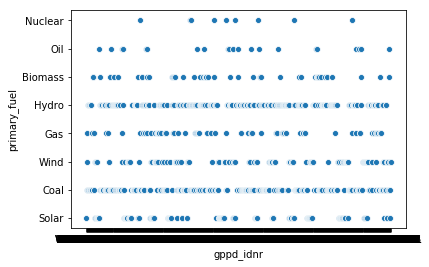

In [276]:
sns.scatterplot(data['gppd_idnr'],data['primary_fuel'])

In [277]:
len(data['gppd_idnr'].unique().tolist())

908

gpdp_idnr has unique id of power plant that are distributed to all classes of primary_fuel

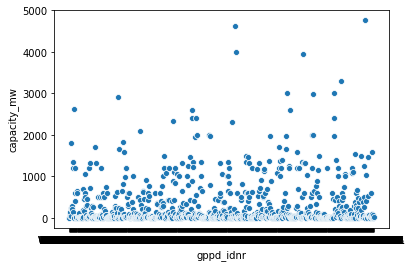

In [278]:
sns.scatterplot(data['gppd_idnr'],data['capacity_mw'])

Only some Powerplant are producing capacity greater then 3000.

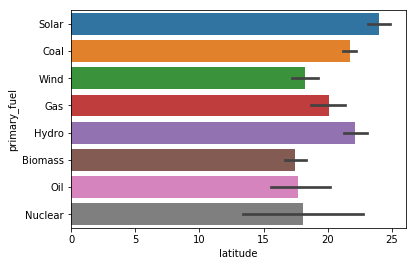

In [279]:
sns.barplot(data['latitude'],data['primary_fuel'])

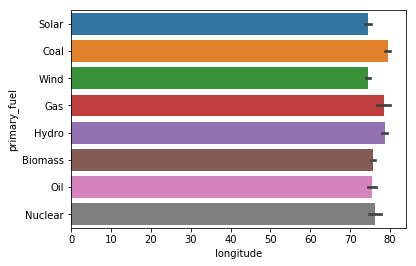

In [280]:
sns.barplot(data['longitude'],data['primary_fuel'])

latitude,longitude of the powerplant location are distributes to all class of primary class.

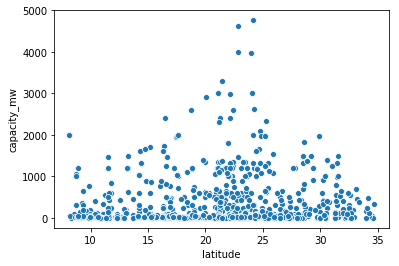

In [281]:
sns.scatterplot(data['latitude'],data['capacity_mw'])

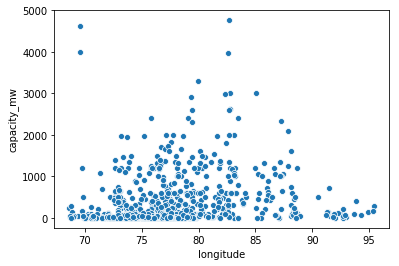

In [282]:
sns.scatterplot(data['longitude'],data['capacity_mw'])

latitude range 20-25 and longitude range o 80 to 85 has high capacity of production.

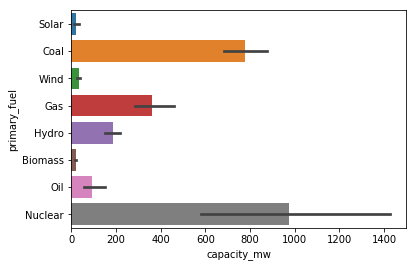

In [283]:
sns.barplot(data['capacity_mw'],data['primary_fuel'])

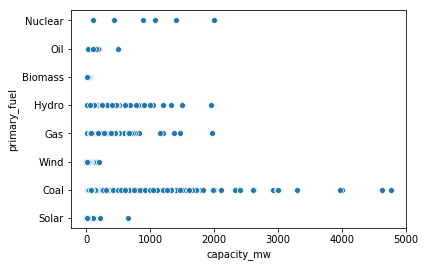

In [284]:
sns.scatterplot(data['capacity_mw'],data['primary_fuel'])

capacity_mw for nuclear and coal class of primary_fuel is more w.r.t. other classes.

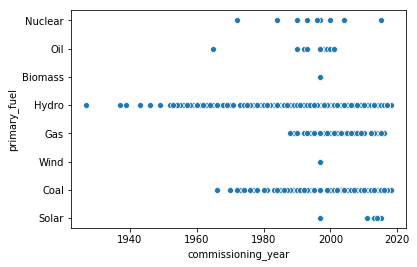

In [285]:
sns.scatterplot(data['commissioning_year'],data['primary_fuel'])

Hydro class type of primary_fuel is distributed or exported before 1940.

Biomass class of primary_fuel is exported after 2000.

gas type of fuel is exported after 1980.

oil & Coal are exported after 1960.

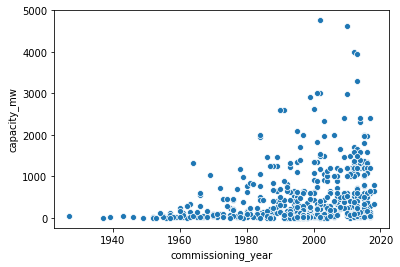

In [286]:
sns.scatterplot(data['commissioning_year'],data['capacity_mw'])

the capacity is gradually inceasing w.r.t. commisioning_year.

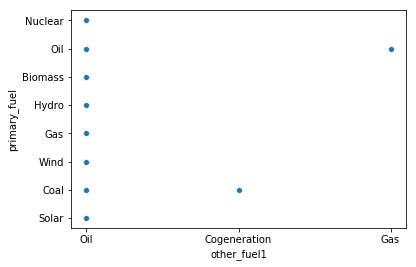

In [287]:
sns.scatterplot(data['other_fuel1'],data['primary_fuel'])

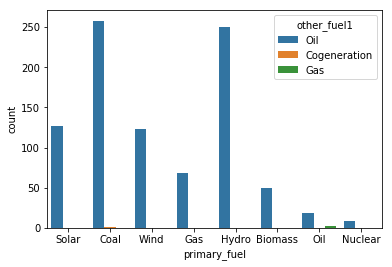

In [288]:
sns.countplot(data['primary_fuel'],hue=data['other_fuel1'])

most of powerplants has no other fuels except their primary fuel oil has some type of fuels..

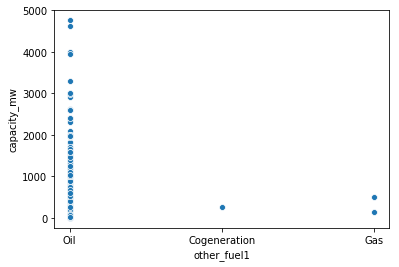

In [289]:
sns.scatterplot(data['other_fuel1'],data['capacity_mw'])

Oil has highest capacity.

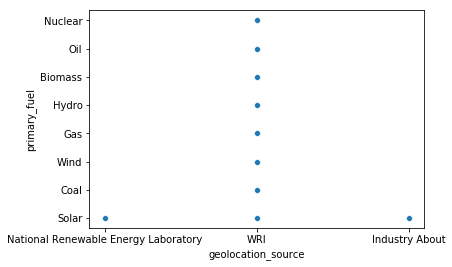

In [290]:
sns.scatterplot(data['geolocation_source'],data['primary_fuel'])

solar has all type of geolocation source while other classes of primary_fuel has only WRI geolocation_source.

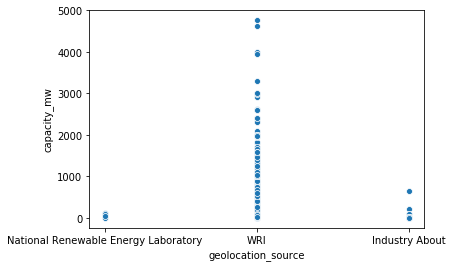

In [291]:
sns.scatterplot(data['geolocation_source'],data['capacity_mw'])

WRI type of location has highest capacity of electricity generation..

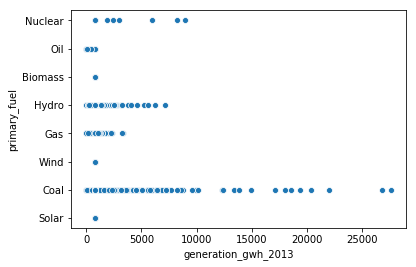

In [292]:
sns.scatterplot(data['generation_gwh_2013'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2013 while other primary_fuel.

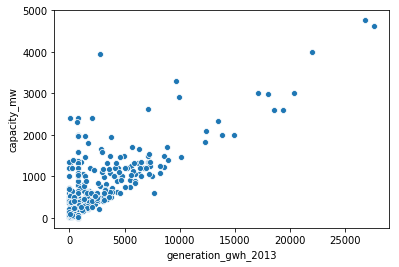

In [293]:
sns.scatterplot(data['generation_gwh_2013'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2013 higher the capacityof elecricity generation.

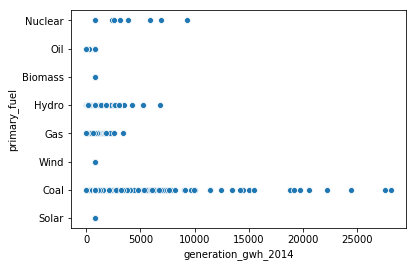

In [294]:
sns.scatterplot(data['generation_gwh_2014'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2014 while other primary_fuel.

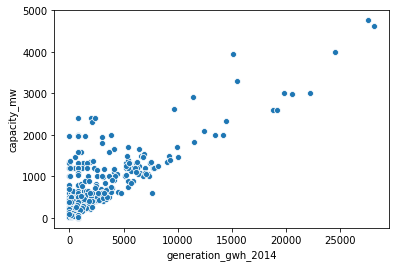

In [295]:
sns.scatterplot(data['generation_gwh_2014'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2014 higher the capacityof elecricity generation.

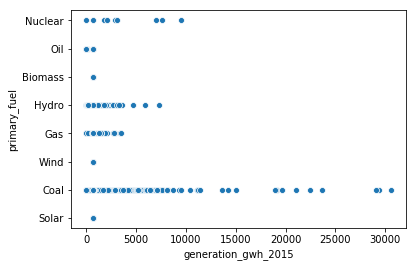

In [296]:
sns.scatterplot(data['generation_gwh_2015'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2015 while other primary_fuel.

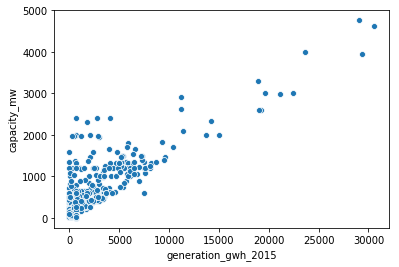

In [297]:
sns.scatterplot(data['generation_gwh_2015'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2015 higher the capacityof elecricity generation.

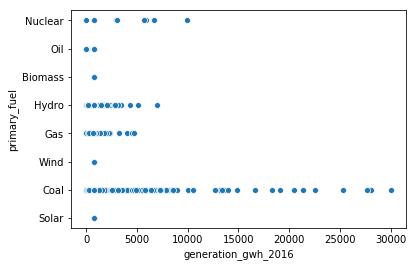

In [298]:
sns.scatterplot(data['generation_gwh_2016'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2016 while other primary_fuel.

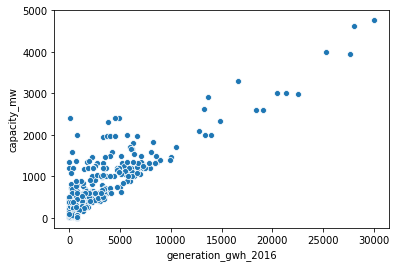

In [299]:
sns.scatterplot(data['generation_gwh_2016'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2016 higher the capacityof elecricity generation.

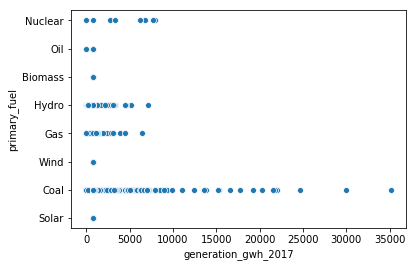

In [300]:
sns.scatterplot(data['generation_gwh_2017'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2017 while other primary_fuel.

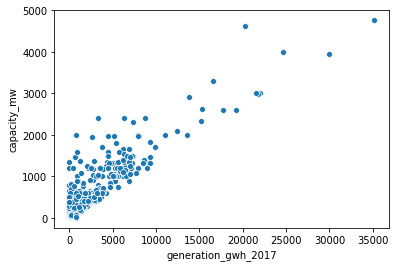

In [301]:
sns.scatterplot(data['generation_gwh_2017'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2017 higher the capacityof elecricity generation.

from yearb 2013 to 2017 the demand or production of coal is very high as compared to oher fuels.

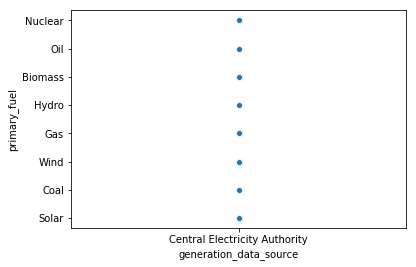

In [302]:
sns.scatterplot(data['generation_data_source'],data['primary_fuel'])

the generatiion for wind and Hydro and for Nuclear is having less generation of source. But for Solar and coal has highest generation source.

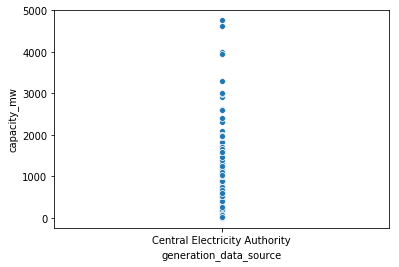

In [303]:
sns.scatterplot(data['generation_data_source'],data['capacity_mw'])

the is only one values in this columns.

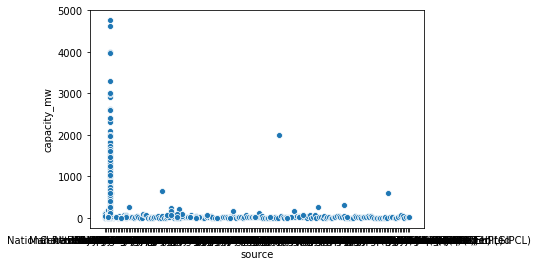

In [304]:
sns.scatterplot(data['source'],data['capacity_mw'])

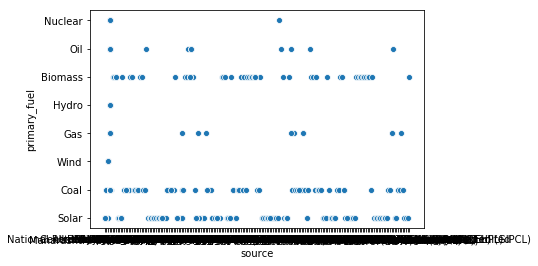

In [305]:
sns.scatterplot(data['source'],data['primary_fuel'])

Central Electricity Authority has the highest capacity of genearing electricity.

the generatiion for wind and Hydro and for Nuclear is having less generation of source. But for Solar and coal has highest generation source.

In [306]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.50,28.183900,73.240700,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority
1,ADITYA CEMENT WORKS,WRI1019881,98.00,24.766300,74.609000,Coal,Oil,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority
2,AES Saurashtra Windfarms,WRI1026669,39.20,21.903800,69.373200,Wind,Oil,1996.876894,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority
3,AGARTALA GT,IND0000001,135.00,23.871200,91.360200,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.00,21.960300,82.409100,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
5,AKRIMOTA LIG,IND0000003,250.00,23.768900,68.644700,Coal,Oil,2005.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority
6,ALIYAR,IND0000004,60.00,10.454700,77.007800,Hydro,Oil,1970.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority
7,ALLAIN DUHANGAN,IND0000005,192.00,32.225800,77.207000,Hydro,Oil,2010.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority
8,ALMATTI DAM,IND0000006,290.00,16.330000,75.886300,Hydro,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority
9,AMAR KANTAK,IND0000007,210.00,23.164200,81.637300,Coal,Oil,2008.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority


In [307]:
le=LabelEncoder()
data['name']=le.fit_transform(data.name)
data['gppd_idnr']=le.fit_transform(data.gppd_idnr)
data['primary_fuel']=le.fit_transform(data.primary_fuel)
data['owner']=le.fit_transform(data.owner)
data['source']=le.fit_transform(data.source)
data['geolocation_source']=le.fit_transform(data.geolocation_source)


In [308]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,Oil,2011.000000,229,109,http://www.nrel.gov/csp/solarpaces/project_det...,1,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
1,1,520,98.0,24.7663,74.6090,1,Oil,1996.876894,258,174,http://www.ultratechcement.com/,2,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
2,2,854,39.2,21.9038,69.3732,7,Oil,1996.876894,2,21,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
3,3,0,135.0,23.8712,91.3602,2,Oil,2004.000000,5,22,http://www.cea.nic.in/,2,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
4,4,1,1800.0,21.9603,82.4091,1,Oil,2015.000000,5,22,http://www.cea.nic.in/,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority


In [309]:
data['other_fuel1']=le.fit_transform(data['other_fuel1'])
data['generation_data_source']=le.fit_transform(data['generation_data_source'])
data['url']=le.fit_transform(data.url)

In [310]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,797.063475,805.760000,701.02725,716.728350,807.601700,0
1,1,520,98.0,24.7663,74.6090,1,2,1996.876894,258,174,173,2,797.063475,805.760000,701.02725,716.728350,807.601700,0
2,2,854,39.2,21.9038,69.3732,7,2,1996.876894,2,21,205,2,797.063475,805.760000,701.02725,716.728350,807.601700,0
3,3,0,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,631.777928,617.789264,843.74700,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,0


In [312]:
data.shape

(908, 18)

### Checking Outliers

In [313]:
features=data.drop(columns=['capacity_mw','primary_fuel'])
target=data[['capacity_mw','primary_fuel']]

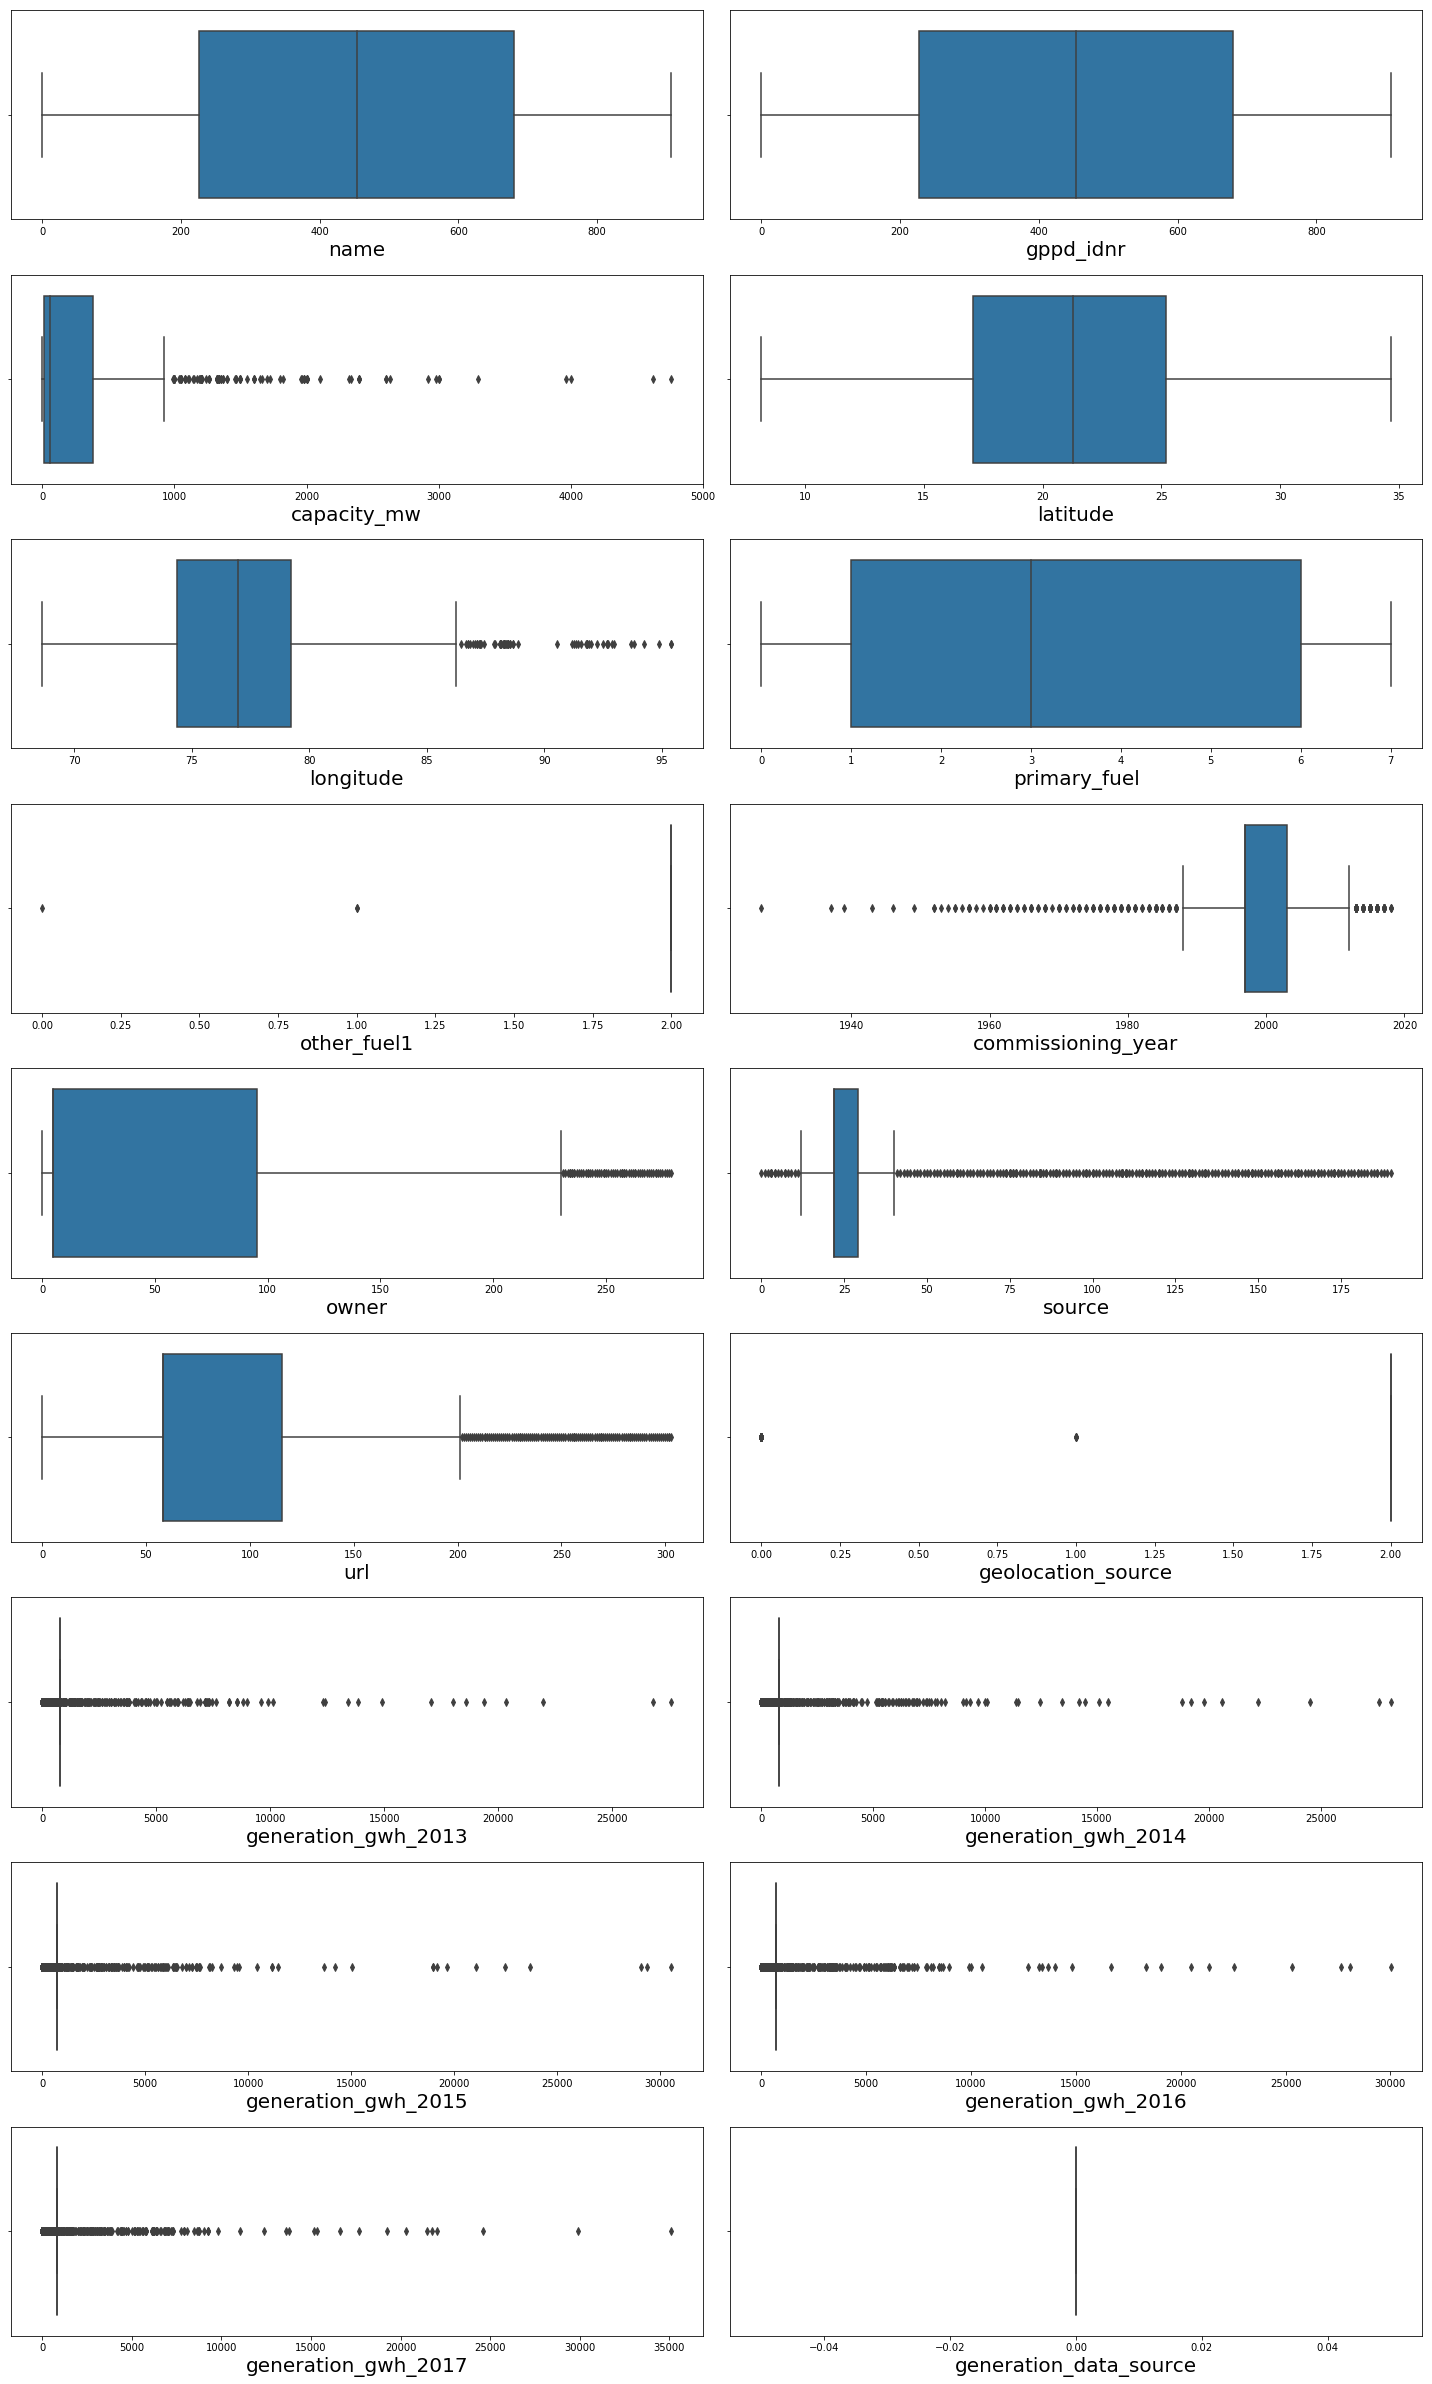

In [314]:

plt.figure(figsize=(20,40))
graph=1
for col in data:
    if graph<=21:
        plt.subplot(11,2,graph)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

there are outliers in our dataset.We have to use Z-score technique to remove these outliers.

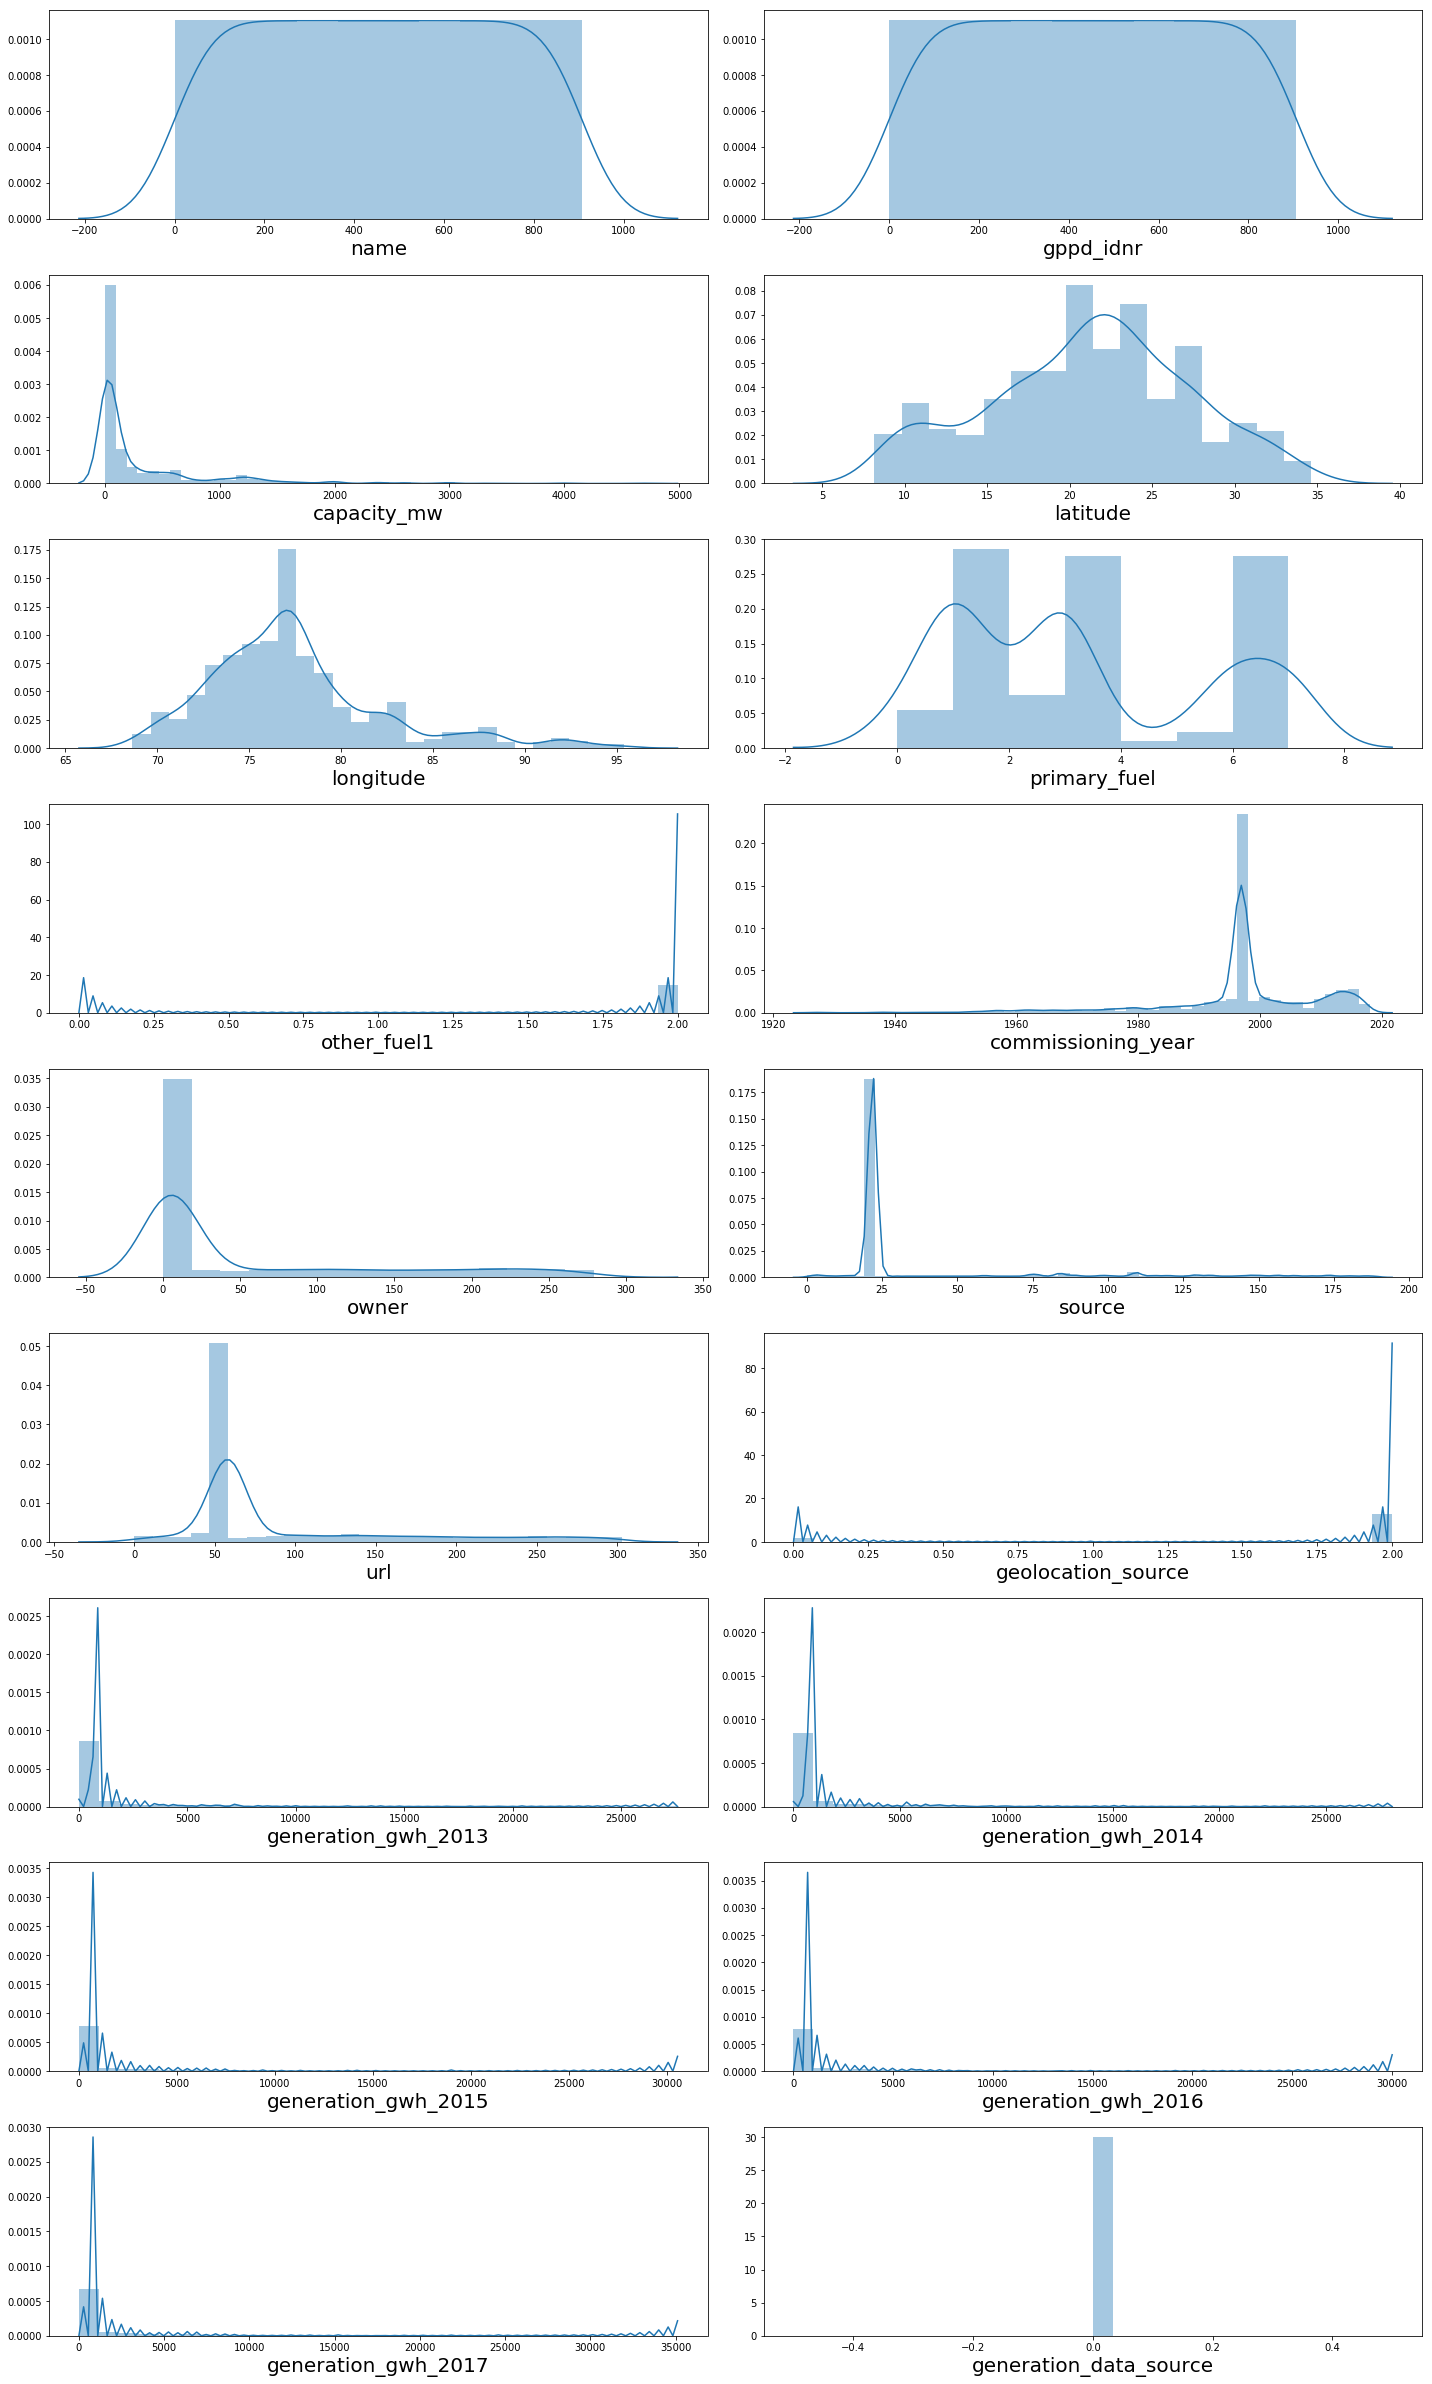

In [315]:

plt.figure(figsize=(20,40))
graph=1
for col in data:
    if graph<=21:
        plt.subplot(11,2,graph)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

name,gppd_idnr,latitude,primary_fuel   seems to be normally distributed while others are skwed.           

In [316]:
data.skew()

name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.193257
latitude                  -0.147391
longitude                  1.129836
primary_fuel               0.471141
other_fuel1              -20.464435
commissioning_year        -1.383330
owner                      1.366078
source                     1.829145
url                        1.512258
geolocation_source        -2.161710
generation_gwh_2013        5.535740
generation_gwh_2014        5.325540
generation_gwh_2015        5.565770
generation_gwh_2016        5.278233
generation_gwh_2017        5.312975
generation_data_source     0.000000
dtype: float64

name,gppd_idnr,latitude,primary_fuel are in range of -0.5 to 0.5. So these are not skewed data while others are skewed.

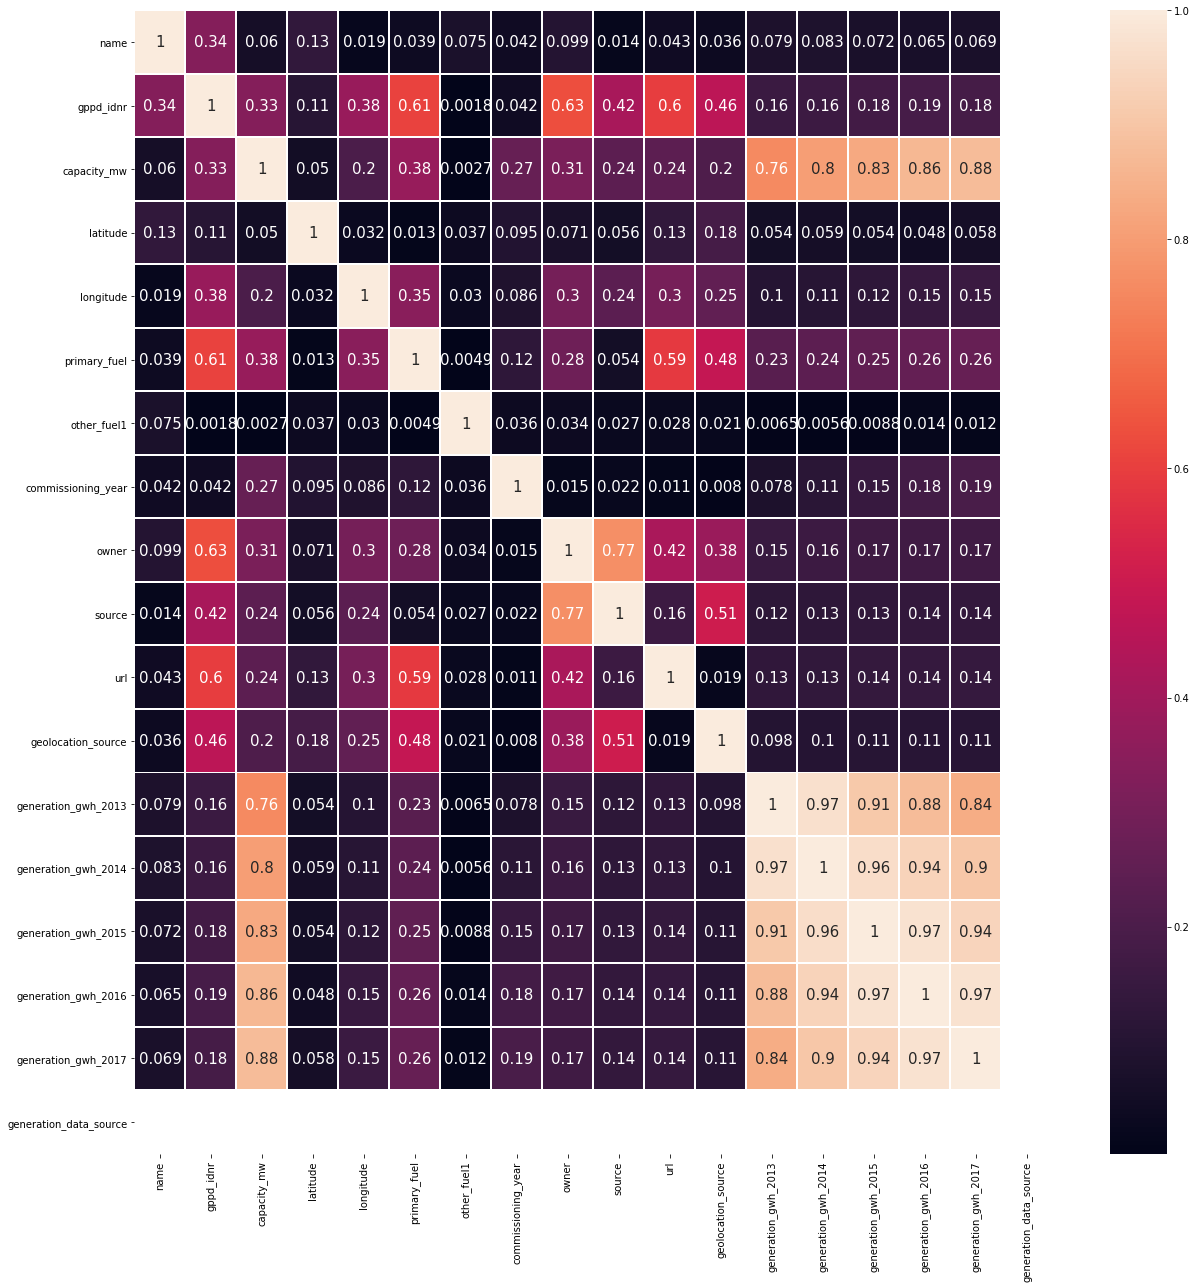

In [317]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

there are some columns of generation growth in which multi-colinearit exiss between their years.

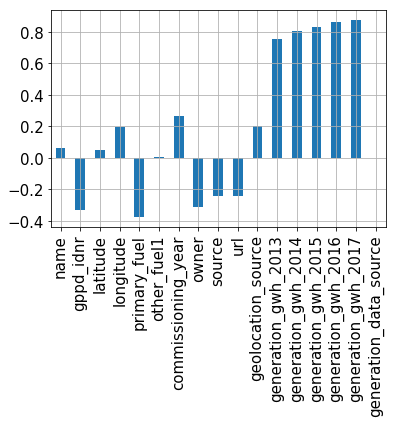

In [318]:
data.drop('capacity_mw',axis=1).corrwith(data.capacity_mw).plot(kind='bar',grid=True,fontsize=15)

other_fuel1 & generation data_source has least relation with the capacity_mw.

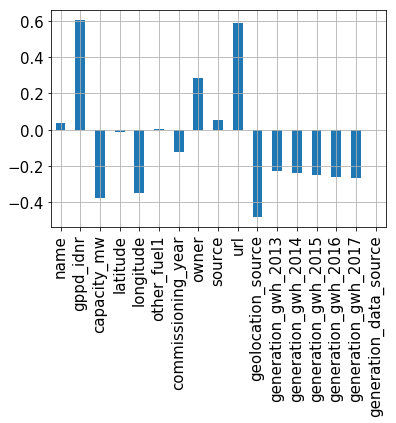

In [319]:
data.drop('primary_fuel',axis=1).corrwith(data.primary_fuel).plot(kind='bar',grid=True,fontsize=15)

latitude,other_fuel1 & generation data_source has least relation with primary_fuel.

In [320]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [321]:
data.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,1996.876894,56.113436,43.823789,94.429515,1.733480,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,0.0
std,262.26132,262.26132,580.221767,6.088110,4.781201,2.281339,0.081214,12.994825,82.501086,44.624092,70.352824,0.676835,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,0.0
min,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.75000,226.75000,16.837500,17.057825,74.390250,1.000000,2.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
50%,453.50000,453.50000,60.000000,21.278850,76.978950,3.000000,2.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
75%,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
max,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


name,gppd_idnr these two columns has unique values. that has to removed.

capacity_mw,generation of all years has mean> std. for that we have to use sqrt to now accurate our data.

In [322]:
data.drop(columns=['name','gppd_idnr'],inplace=True)

In [324]:
data['capacity_mw']=np.sqrt(data.capacity_mw)
data['generation_gwh_2013']=np.sqrt(data.generation_gwh_2013)
data['generation_gwh_2017']=np.sqrt(data.generation_gwh_2017)
data['generation_gwh_2015']=np.sqrt(data.generation_gwh_2015)
data['generation_gwh_2014']=np.sqrt(data.generation_gwh_2014)
data['generation_gwh_2016']=np.sqrt(data.generation_gwh_2016)

In [341]:
data=data[~data.isin([np.nan,np.inf,-np.inf])]
data.dropna(inplace=True)

In [337]:
data=data.drop(columns=["generation_gwh_2016","generation_gwh_2014","generation_data_source"])

KeyError: "['generation_gwh_2016' 'generation_gwh_2014' 'generation_data_source'] not found in axis"

In [342]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
0,1.581139,28.183900,73.240700,6,2,2011.000000,229,109,128,1,28.232313,26.476919,28.418334
1,9.899495,24.766300,74.609000,1,2,1996.876894,258,174,173,2,28.232313,26.476919,28.418334
2,6.260990,21.903800,69.373200,7,2,1996.876894,2,21,205,2,28.232313,26.476919,28.418334
3,11.618950,23.871200,91.360200,2,2,2004.000000,5,22,58,2,25.135193,29.047323,25.763822
4,42.426407,21.960300,82.409100,1,2,2015.000000,5,22,58,2,40.844706,76.917943,73.386509
5,15.811388,23.768900,68.644700,1,2,2005.000000,5,22,58,2,28.667019,34.768549,33.880865
6,7.745967,10.454700,77.007800,3,2,1970.000000,5,22,58,2,12.147776,12.336742,9.467291
7,13.856406,32.225800,77.207000,3,2,2010.000000,5,22,58,2,26.395810,26.857684,26.069042
8,17.029386,16.330000,75.886300,3,2,2004.000000,5,22,58,2,22.468050,12.018078,20.961205
9,14.491377,23.164200,81.637300,1,2,2008.000000,5,22,58,2,51.403521,40.534504,39.540574


this we did as there was multi-colinearty existed that we see in the heatmap.

In [367]:
df=data.copy()

#### Droppping duplicates

In [368]:
df.drop_duplicates(inplace=True)

In [369]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,12.961430,21.196189,77.447848,3.205947,1.995595,1996.876894,56.113436,43.823789,94.429515,1.733480,32.012290,31.441288,33.203375
std,12.378063,6.088110,4.781201,2.281339,0.081214,12.994825,82.501086,44.624092,70.352824,0.676835,20.249645,22.690316,23.386513
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.103283,17.057825,74.390250,1.000000,2.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,28.232313,26.476919,28.418334
50%,7.745967,21.278850,76.978950,3.000000,2.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,28.232313,26.476919,28.418334
75%,19.700888,25.183775,79.211600,6.000000,2.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,28.232313,26.476919,28.418334
max,68.992753,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,166.090939,174.754113,187.392636


Now its seems to be accurate.

### `Removing Outliers for both dataframe`

In [370]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2015', 'generation_gwh_2017'],
      dtype='object')

In [372]:
#Removing for prediction of capacity target variable dataset.
zs=zscore(df[[ 'longitude','commissioning_year', 'owner', 'source', 'url','geolocation_source', 'generation_gwh_2013', 'generation_gwh_2015','generation_gwh_2017']])
filtered=(np.abs(zs)<3).all(axis=1)
df=df[filtered]

In [373]:
df.shape

(837, 13)

#### Dataloss

In [374]:
print("Lost data ::"+str(round(((908-837)/908)*100,2))+"%")

Lost data ::7.82%


#### `Normalizing Distribution`

In [375]:
df.skew()

capacity_mw             1.176027
latitude               -0.110606
longitude               0.849302
primary_fuel            0.418933
other_fuel1           -19.644909
commissioning_year     -0.853084
owner                   1.327522
source                  1.790332
url                     1.437903
geolocation_source     -2.110249
generation_gwh_2013     1.543073
generation_gwh_2015     1.409875
generation_gwh_2017     1.280772
dtype: float64

In [376]:
features=["longitude","commissioning_year","owner","source","url","geolocation_source",'generation_gwh_2013', 'generation_gwh_2015', 'generation_gwh_2017',]
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df[features]=scalar.fit_transform(df[features].values)
df[features].head()

,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017
0,-0.935710,1.278696,1.479781,1.618164,0.724924,-2.288833,-0.043553,-0.053351,-0.038863
1,-0.518036,-0.197813,1.503393,2.092390,1.199546,0.403076,-0.043553,-0.053351,-0.038863
2,-2.351398,-0.197813,-1.861684,-0.467489,1.476532,0.403076,-0.043553,-0.053351,-0.038863
3,2.512930,0.495620,-0.735874,-0.399180,-0.422815,0.403076,-0.255766,0.099175,-0.189626
4,1.270220,1.776922,-0.735874,-0.399180,-0.422815,0.403076,0.740870,2.293169,1.966357


In [377]:
df.skew()

capacity_mw             1.176027
latitude               -0.110606
longitude              -0.000628
primary_fuel            0.418933
other_fuel1           -19.644909
commissioning_year      0.024407
owner                   0.440132
source                 -0.181446
url                     0.064581
geolocation_source     -2.082067
generation_gwh_2013     0.277720
generation_gwh_2015     0.162696
generation_gwh_2017     0.126371
dtype: float64

the value that are in range of -0.5 to 0.5. are not skewed.

## `Model Deployment for Regression Problem(Predicting Capacity_mw)`

In [378]:
X=df.drop(columns=['capacity_mw'],axis=1)
Y=df['capacity_mw']

split features and target variable.

### `Normalizing the data`

In [379]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[ 1.15481151, -0.93570995,  1.17370541, ..., -0.04355333,
        -0.0533511 , -0.03886313],
       [ 0.59795195, -0.51803634, -0.98350019, ..., -0.04355333,
        -0.0533511 , -0.03886313],
       [ 0.13153969, -2.35139806,  1.60514654, ..., -0.04355333,
        -0.0533511 , -0.03886313],
       ...,
       [-0.94841852, -0.24356131,  1.60514654, ..., -0.04355333,
        -0.0533511 , -0.03886313],
       [ 0.53012053, -0.77646424, -0.98350019, ..., -0.04355333,
        -0.0533511 , -0.03886313],
       [-1.81873971,  0.24410104,  1.60514654, ..., -0.04355333,
        -0.0533511 , -0.03886313]])

In [380]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()
GradientBoosting=GradientBoostingRegressor()

In [381]:
algo=[Linear,DecisionTree,RandomForest,Bagging,GradientBoosting]

In [382]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(100,180):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))

    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 74.50368252830783 of model LinearRegression() at random state 147

MEAN ABSOLUTE ERROR: 4.7758738974931685

MEAN SQUARED ERROR for the model: 36.92347245771581

ROOT MEAN SQUARED ERROR for the model: 6.0764687490117


DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 82.61412472629229 of model DecisionTreeRegressor() at random state 161

MEAN ABSOLUTE ERROR: 3.2828219150306017

MEAN SQUARED ERROR for the model: 23.692347445203193

ROOT MEAN SQUARED ERROR for the model: 4.867478551077878


RandomForestRegressor():
---------------------------
---------------------------

The highest accuracy is 91.32709692002861 of model RandomForestRegressor() at random state 147

MEAN ABSOLUTE ERROR: 2.4346114432017174

MEAN SQUARED ERROR for the model: 12.55999806079089

ROOT MEAN SQUARED ERROR for the model: 3.5440087557441067


BaggingRegresso

In [383]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.6228164009162225 at k-fold::2

Mean CV Score of model LinearRegression():: 0.6308447285347386 at k-fold::3

Mean CV Score of model LinearRegression():: 0.6296005960453015 at k-fold::4

Mean CV Score of model LinearRegression():: 0.630452629794315 at k-fold::5

Mean CV Score of model LinearRegression():: 0.6279847466420302 at k-fold::6

Mean CV Score of model LinearRegression():: 0.6208362194085861 at k-fold::7

Mean CV Score of model LinearRegression():: 0.3408257021710307 at k-fold::8

Mean CV Score of model LinearRegression():: 0.6198064551425992 at k-fold::9

Mean CV Score of model LinearRegression():: 0.6173313876415156 at k-fold::10

Mean CV Score of model LinearRegression():: 0.6208385150888845 at k-fold::11

Mean CV Score of model LinearRegression():: 0.6263377772423125 at k-fold::12

Mean CV Score of model LinearRegression():: 0.6160140170698577 at k-fold::13

Mean CV Score of model Li

In [384]:
CVmodel

{'LinearRegression()': [0.6308447285347386],
 'DecisionTreeRegressor()': [0.742083676236509],
 'RandomForestRegressor()': [0.8389462478971661],
 'BaggingRegressor()': [0.8296468845046516],
 'GradientBoostingRegressor()': [0.8349012049900066]}

In [385]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::11.42
DecisionTreeRegressor()::8.41
RandomForestRegressor()::7.43
BaggingRegressor()::7.96
GradientBoostingRegressor()::7.84


here for model RandomForestRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 7.43 .

In [386]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.25,random_state=147)

#### `Plotting regplot graph for BaggingRegressor model`

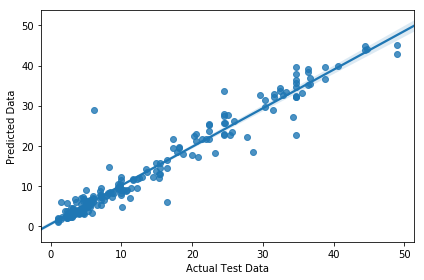

In [387]:
RandomForest.fit(X_train,Y_train)
Y_pred=Bagging.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are close and some are deviated too to the best fit line.

## Regularization

In [388]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.011099999999999999, 'max_iter': 1000, 'normalize': True}

In [389]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

72.164625353577

Here we can see that our model is not overfitted or underfitted as the r2 score Lasso model is 72.16 while the RandomForest r2-score is 91.32.

### `Hyper parameter Tuning`

In [399]:
reg=RandomForestRegressor()

param={
    'n_estimators':range(98,105,2),
    'criterion':["squared_error", "absolute_error"],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3]
}
grd=GridSearchCV(reg,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the beast parameter to algo

reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

print("Accuracy::",r2_score(Y_test,Y_pred))

mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print("\nMEAN ABSOLUTE ERROR:",mae)

print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
print(f"\nROOT MEAN SQUARED ERROR for the model:",np.sqrt(mse))

Best Pramaeters: {'criterion': 'squared_error', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 98}
Accuracy:: 0.8904524536692663

MEAN ABSOLUTE ERROR: 2.7253681809182737

MEAN SQUARED ERROR for the model: 15.86224105026137

ROOT MEAN SQUARED ERROR for the model: 3.9827429053682804


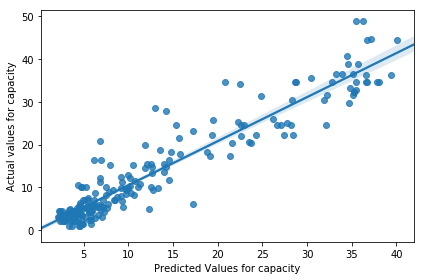

In [400]:
sns.regplot(Y_pred,Y_test)
plt.xlabel("Predicted Values for capacity")
plt.ylabel("Actual values for capacity")
plt.tight_layout()

Here we analyse that the data points are close to the best fit line.

## Saving model

In [401]:
import pickle
pickle.dump(reg,open("GLobalPowerPlant_CapacityPrediction.pickle","wb"))

## Model Deployment for Classification Problem

In [402]:
X=df.drop(columns=['primary_fuel'],axis=1)
Y=df['primary_fuel']

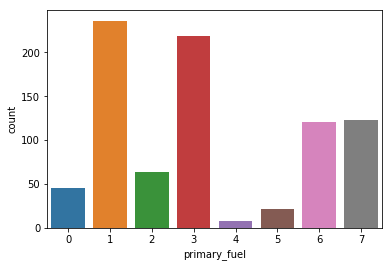

In [403]:
sns.countplot(df['primary_fuel'])

Seems to be not Balanced.

In [404]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

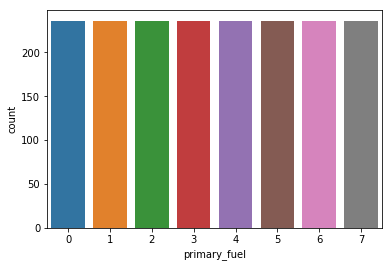

In [405]:
sns.countplot(Y)

Now for everyClass the target variable is  balanced.

In [406]:
X.shape

(1888, 12)

Now there are 1888 no. of records.

### Normalizing the features

In [407]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[-0.99977451,  1.4287823 , -0.88843675, ..., -0.04891712,
        -0.01261596,  0.03520618],
       [-0.24115772,  0.84086582, -0.41623653, ..., -0.04891712,
        -0.01261596,  0.03520618],
       [-0.57298178,  0.34844105, -2.48894063, ..., -0.04891712,
        -0.01261596,  0.03520618],
       ...,
       [-0.49685828, -0.97636679,  0.45225575, ..., -0.04891712,
        -0.01261596,  0.03520618],
       [-0.81979297, -0.01527764, -0.66387984, ..., -0.04891712,
        -0.01261596,  0.03520618],
       [-0.75977346, -0.88887188,  0.0973132 , ..., -0.04891712,
        -0.01261596,  0.03520618]])

In [408]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [409]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,Bagging]

In [410]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(150,189,4):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 81.21693121693121 of model LogisticRegression() at random state 166


Confusion Matrix:

 [[43  1  0  0  0  0  0  0]
 [ 5 25  8  4  7  1  0  0]
 [ 1  5 22  7  5  3  0  0]
 [ 0  0  6 34  1  3  0  0]
 [ 0  5  0  5 34  1  0  0]
 [ 1  3  0  0  0 41  0  1]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 55]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91        44
           1       0.64      0.50      0.56        50
           2       0.61      0.51      0.56        43
           3       0.68      0.77      0.72        44
           4       0.72      0.76      0.74        45
           5       0.84      0.89      0.86        46
           6       1.00      1.00      1.00        51
           7       0.98      1.00      0.99        55

    accuracy                           0.81       378
   mac

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [411]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7632415254237288 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.7637814284873108 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.7627118644067796 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.7616535444121652 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.766429076938631 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.765889734662969 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.763771186440678 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.7674742411584518 at k-fold::9


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.8654661016949152 at k-fold::2

Mean CV Score of model DecisionTreeClassifier():: 0.8665261900556018 at k-fold::3

Mean CV Score of model DecisionTreeClassifier():: 0.8654661016949152 at k-fold::4

Mean CV Score of m

In [412]:
CVmodel

{'LogisticRegression()': [0.7674742411584518],
 'DecisionTreeClassifier()': [0.8840042372881356],
 'RandomForestClassifier()': [0.932746006430217],
 'KNeighborsClassifier()': [0.8882433356117566],
 'AdaBoostClassifier()': [0.3755335167099873],
 'BaggingClassifier()': [0.9131566289461026]}

here we can see the maximun CV score of each model

In [413]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::4.47
DecisionTreeClassifier()::1.55
RandomForestClassifier()::2.49
KNeighborsClassifier()::2.45
AdaBoostClassifier()::7.42
BaggingClassifier()::2.07


here for model DecisionTreeClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 1.55 .

In [414]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=158)

here we take RandomState 158 because it is the best to use for DecisionTreeClassifier

In [415]:
Linear.fit(X_train,Y_train)
DecisionTree.fit(X_train,Y_train)
RandomForest.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
AdaBoost.fit(X_train,Y_train)
Bagging.fit(X_train,Y_train)

BaggingClassifier()

In [416]:
Y_pred_linear=Linear.predict(X_test)
Y_pred_prob_linear=Linear.predict_proba(X_test)

Y_pred_dt=DecisionTree.predict(X_test)
Y_pred_prob_dt=DecisionTree.predict_proba(X_test)

Y_pred_rf=RandomForest.predict(X_test)
Y_pred_prob_rf=RandomForest.predict_proba(X_test)

Y_pred_knn=knn.predict(X_test)
Y_pred_prob_knn=knn.predict_proba(X_test)

Y_pred_ada=AdaBoost.predict(X_test)
Y_pred_prob_ada=AdaBoost.predict_proba(X_test)

Y_pred_br=Bagging.predict(X_test)
Y_pred_prob_br=Bagging.predict_proba(X_test)
print("All models test scored are captured!!")

All models test scored are captured!!


### `DecisionTree`

AUC ROC Score of V Model : 0.9400648304311966


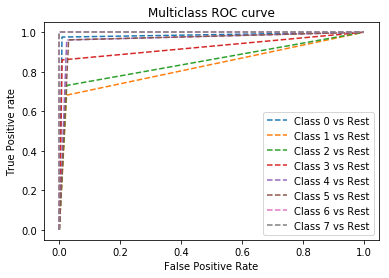

In [417]:
print("AUC ROC Score of V Model :",roc_auc_score(Y_test, Y_pred_prob_dt, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_dt[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `RandomForest`

AUC ROC Score of V Model : 0.9924467766293847


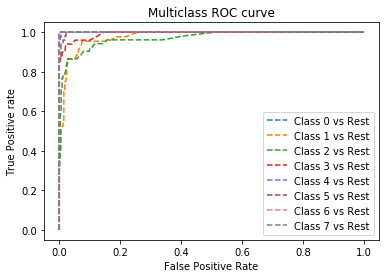

In [418]:
print("AUC ROC Score of V Model :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### KNN

AUC ROC Score of Knn Model : 0.9720284775333624


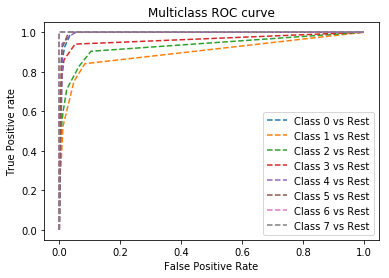

In [419]:
print("AUC ROC Score of Knn Model :",roc_auc_score(Y_test, Y_pred_prob_knn, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_knn[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `AdaBoost`

AUC ROC Score of AdaBoost Model : 0.7557986179017926


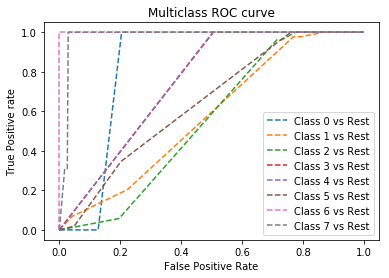

In [421]:
print("AUC ROC Score of AdaBoost Model :",roc_auc_score(Y_test, Y_pred_prob_ada, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_ada[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `Bagging`

AUC ROC Score of Baggin Model : 0.9912582443385374


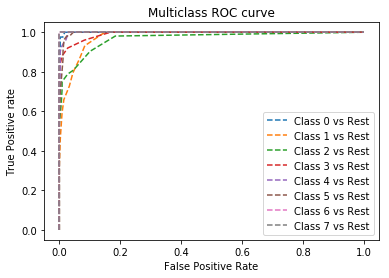

In [422]:
print("AUC ROC Score of Baggin Model :",roc_auc_score(Y_test, Y_pred_prob_br, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_br[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `Linear`

AUC ROC Score of Linear Model : 0.9411303564746325


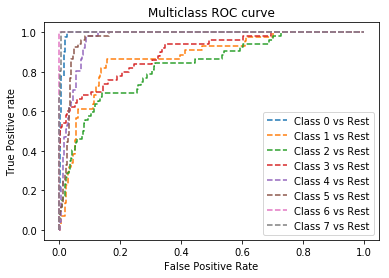

In [423]:
print("AUC ROC Score of Linear Model :",roc_auc_score(Y_test, Y_pred_prob_linear, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_linear[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

Here we plot the Roc Curve for each model with their Auc_roc_score.

## `Hyperparameter Tuning`

In [427]:
para={
    'criterion':['gini','entropy'],
    'min_samples_split':[1,2],
    'min_samples_leaf':[1,2],
    'min_impurity_decrease':[0.0,0.1],
    'min_samples_leaf':[1,2]
}

In [428]:
grid=GridSearchCV(estimator=DecisionTree,cv=8,param_grid=para,n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [429]:
DecisionTree=DecisionTreeClassifier(criterion='entropy',min_impurity_decrease= 0.0,min_samples_leaf= 1,min_samples_split= 2)
DecisionTree.fit(X_train,Y_train)

Y_pred=DecisionTree.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.9047619047619048

here now slight increase in accurcy.

AUC ROC Score of DecisionTree model using DecisionTree as base estimator : 0.9465070764125386


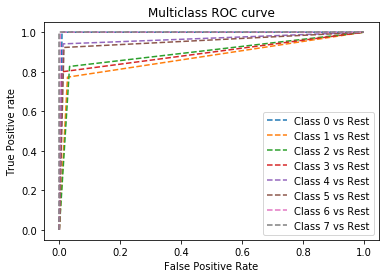

In [430]:
Y_pred_prob=DecisionTree.predict_proba(X_test)

print("AUC ROC Score of DecisionTree model using DecisionTree as base estimator :",roc_auc_score(Y_test, Y_pred_prob, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

showing roc_Auc Curve for DecisionTree.

### Saving Model

In [431]:
import pickle
pickle.dump(DecisionTree,open("globalPowerPlant_predictingPrimaryFuel.pickle","wb"))